In [273]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Import Modules

Matplotlib/Pyplot used for graphing functions

Pandas used for CSV import


In [184]:
## Building Pandas DF from CSV
dataframe = pd.read_csv('data/ramen-ratings.csv',header=0)

## Data Cleaning
df = dataframe[dataframe['Stars'] != 'Unrated']
df = df[df['Country'] != '']
df = df.replace('United States','USA')            ## United States and USA are synonymous; unifying terms.
df = df.replace('Holland','Netherlands')          ## Holland is a province of the Netherlands; unifying terms. 
df = df.replace('Sarawak','Malaysia')             ## Sarawak is a state within Malaysia; unifying terms.


## Building a Top-Ten List
df_top = df.fillna(0)
df_top = df_top[df_top['Top Ten'] != 0]

## Converting DF to Dict for application of different methods
dictionary = df.to_dict('records')
dict_top = df_top.to_dict('records')

### Import and Clean the Data

A dataframe is built from the CSV. 

This dataframe is then cleaned, removing instances where Star-Rating and Country are not provided. 

A datafram of all top-ten entries is generated for future use.

The full dataframe and top-ten dataframe are converted to dict format, so both Pandas and vanilla methods can be used. 

In [185]:
print(f"\n{dictionary[0]}\n")
print(df.iloc[0])


{'Review #': 2580, 'Brand': 'New Touch', 'Variety': "T's Restaurant Tantanmen ", 'Style': 'Cup', 'Country': 'Japan', 'Stars': '3.75', 'Top Ten': nan}

Review #                         2580
Brand                       New Touch
Variety     T's Restaurant Tantanmen 
Style                             Cup
Country                         Japan
Stars                            3.75
Top Ten                           NaN
Name: 0, dtype: object


##### Note: 

Both storage formats contain the same data. However, this data is displayed in different formats, and different methods are required to interact with them. 

### Building hi-lo star lists

If a review's star rating is equal to the perfect score of 5 / 5, it is added to the High-Star list. This represents some of the best ramen available. 

If a review's star rating is less than .5 / 5, it is added to the Low-Star list. This represents some of the worst ramen available. 

### Building list of all nations

In [188]:
nation_count = df['Country'].value_counts()
print(nation_count)

Japan          352
USA            324
South Korea    307
Taiwan         224
Thailand       191
China          169
Malaysia       158
Hong Kong      137
Indonesia      126
Singapore      109
Vietnam        108
UK              69
Philippines     47
Canada          41
India           31
Germany         27
Mexico          25
Australia       22
Netherlands     19
Myanmar         14
Nepal           14
Hungary          9
Pakistan         9
Bangladesh       7
Colombia         6
Cambodia         5
Brazil           5
Poland           4
Fiji             4
Sweden           3
Dubai            3
Finland          3
Ghana            2
Estonia          2
Nigeria          1
Name: Country, dtype: int64


### Defining Count of Nations

This is used in the pie chart, where it ends up determining the bounds for each slice. 

In [17]:
def simplify_pie_sizes(ls):
    simplified = []
    others = []
    for i in ls:
        if i >= 100:
            simplified.append(i)
        if i <= 99:
            others.append(i)
    simplified.append(sum(others))
    return simplified

def simplify_pie_labels(ls):
    i = len(simplify_pie_sizes(list(nation_count)))
    simplified = ls[:i-1]
    simplified.append('Others')
    return simplified

### Defining 'simplified'

These functions cut the pie chart down to size. 

The first function selects any count values above 100, then sums the remainder into a 'Other' bucket. 

The second function selects the corresponding nations to those values over 100, then inserts an 'Other' label for the remainder to fall under. 

In [18]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '({v:d})'.format(v=val)
    return my_autopct

title = {
    'family': 'sans',
    'color':  'black',
    'weight': 'bold',
    'size': 13,
        }
label = {
    'family': 'sans',
    'color':  'black',
    'size': 8,
        }
colors = []

### Pie Chart Helper Function & Formatting Dictionaries

This function will be called to determine the autopct (number labelling) for the pie chart.

The dictonaries contain text formatting arguments that will be passed into the title and labels to save space in the plot definition.

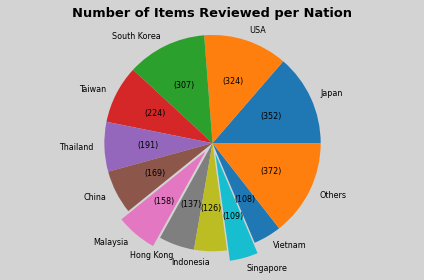

In [19]:
## Defining the plot
fig1, ax1 = plt.subplots()

## Providing Data
labels = simplify_pie_labels(list(nation_count.index.to_list()))              ## List of nation names. Matches to count.
sizes = simplify_pie_sizes(list(nation_count))                                ## List of count of nation names. Governs pie width.
explode = (0,0,0,0,0,0,.1,0,0,.1,0,0)                                         ## Malaysia and Singapore are outliers in terms of performance.

## Spec build & Format

ax1.pie(sizes, 
        labels=labels, 
        explode=explode, 
        textprops=label, 
        autopct=make_autopct(sizes),                                          ## Calling helper function for whole number slice labelling 
        startangle=0)
ax1.axis('equal')
ax1.set_title('Number of Items Reviewed per Nation', fontdict=title)

## Under formatting
fig1.set_facecolor('lightgrey')

## Display
plt.tight_layout()
plt.show()

## Baking a Pie

The plot is defined. 

Data is provided, funneling through the simplification functions. 

Formatting is performed, labelling each slice with the number of items it represents. 

Nations with less than 100 items reviewed are placed in an 'Other' slice. 

## Up Next: Bar Graphs

In [342]:
## Generate a list of all 5 star reviews
high_star = []
for item in dictionary:
    if float(item['Stars']) == 5:
        high_star.append(item)
        
## Generate a list of all <.5 star reviews
low_star = []
for item in dictionary:
    if float(item['Stars']) <= .5:
        low_star.append(item)

## Generate a list of all nations with items reviewed.
all_nations = []
for i in dictionary:
    if i['Country'] not in all_nations:
        all_nations.append(i['Country'])
        
## Generate a list of all nations with items with 5 star reviews. 
star_nations = []
for i in high_star:
    if i['Country'] not in star_nations:
        star_nations.append(i['Country'])

""" 
Generates paired exclusive lists: 
Nations with 5 star reviews sorted by number of 5 star reviews. 
Corresponding number of 5 star reviews. 
Corresponding total number of reviews.
"""
def paired_list_gen():
    hi_star_df = pd.DataFrame(high_star, columns=['Country'])
    hi_star_countries_full = hi_star_df['Country'].to_list()
    hi_star_countries_values = hi_star_df['Country'].value_counts().to_list()
    hi_star_countries_sorted = []

    for i in list(sorted(hi_star_countries_full,key=hi_star_countries_full.count,reverse=True)):
        if i not in hi_star_countries_sorted:
            hi_star_countries_sorted.append(i)
    
    return hi_star_countries_sorted,hi_star_countries_values
paired_list_gen()


df2 = pd.DataFrame(
        {'Country': list(nation_count.index.to_list()),
         'FCount': nation_count.to_list()}
        )
## Overcomplicated way to generate the corresponding total because my brain is too smooth to think of a way to do it properly
def hi_totals():
    split = df2.to_dict('split')
    split_list = split['data']
    split_nat = []
    split_val = []
    for i in split_list:
        if i[0] in hi_star_countries_sorted:
                split_nat.append(i[0])
                split_val.append(i[1])
        res = {split_nat[i]: split_val[i] for i in range(len(split_nat))}

    res = sorted(res.items(), key=lambda pair: hi_star_countries_sorted.index(pair[0]))
    hi_star_countries_totals = []
    for i in res:
        hi_star_countries_totals.append(i[1])
    return hi_star_countries_totals
hi_totals()

print(hi_star_countries_sorted)
print(hi_star_countries_totals)
print(hi_star_countries_values)

['Japan', 'Malaysia', 'Taiwan', 'South Korea', 'Singapore', 'USA', 'Indonesia', 'Hong Kong', 'Thailand', 'China', 'UK', 'Myanmar', 'India', 'Cambodia', 'Canada', 'Philippines', 'Germany', 'Vietnam', 'Mexico', 'Australia', 'Brazil', 'Nepal']
[352, 158, 224, 307, 109, 324, 126, 137, 191, 169, 69, 14, 31, 5, 41, 47, 27, 108, 25, 22, 5, 14]
[74, 55, 48, 44, 36, 31, 23, 22, 19, 12, 4, 4, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1]


## Determine the Values

This section generates the initial data to be used in determining high and low performing nations. 

For this report's purposes, 'high performing' can be determined by an abnormally high percentage of 5 star reviews.

For this report's purposes, 'low performing' can be identified by an abnormally low percentage of 5 star reviews, or an abnormally high percentage of <=.5 star reviews. 

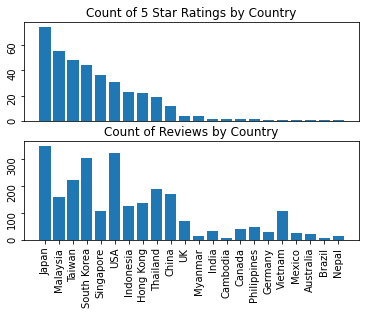

In [319]:
x1 = hi_star_countries_sorted
h1 = hi_star_countries_totals
h2 = hi_star_countries_values

fig, axs = plt.subplots(2)
axs[0].set_title('Count of 5 Star Ratings by Country')
axs[0].bar(x1,h2)
axs[0].tick_params(labelrotation=90)
axs[0].get_xaxis().set_visible(False)

axs[1].set_title('Count of Reviews by Country')
axs[1].bar(x1,h1)
axs[1].tick_params(labelrotation=90)

plt.show()

## Setting the Bar

This graph displays the number of 5 star reviews by country. 

Below is displayed the total number of reviews for each country. 

However, this data can be displayed in a number of different ways.

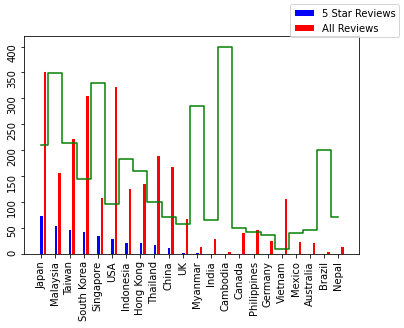

In [384]:
x1 = hi_star_countries_sorted
h1 = hi_star_countries_totals
h2 = hi_star_countries_values

fig, bar1 = plt.subplots()

# set width of bar
barWidth = 0.25 
 
# Set position of bar on X axis
r1 = np.arange(len(h2))
r2 = [x + barWidth for x in r1]

 
# Make the plot
bar1.bar(r1, h2, color='blue', width=barWidth, edgecolor='white', label='5 Star Reviews')
bar1.bar(r2, h1, color='red', width=barWidth, edgecolor='white', label='All Reviews')


percentiles = [(i*100 / j*10) for i, j in zip(h2, h1)] 

bar1.plot(x1,percentiles,ds='steps-mid',c='Green')
bar1.tick_params(labelrotation=90)

# Add xticks on the middle of the group bars
bar1.tick_params(labelrotation=90)

# Create legend & Show graphic
fig.legend()
plt.show()


## Raising the Bar

A simpler view displays how each country performs. 

Red values display the total number of reviews per country, an approximation of the number of offerings available.

Blue values display the number of 5 star reviews per country, an approximation of performance. 

The green line displays the percentage of 5 star reviews to all reviews, a measure of over/under-performance. This can help to identify instances where countries perform abnormally well: 

Abnormally well performing nations include Malaysia, Singapore, Myanmar. (Low sample size in Cambodia and Brazil must be taken into account).

Abnormally poor performing nations include the United States and Vietnam. 

In [346]:
kappa = zip(x1,h1,h2)

print(list(kappa))

[('Japan', 352, 74), ('Malaysia', 158, 55), ('Taiwan', 224, 48), ('South Korea', 307, 44), ('Singapore', 109, 36), ('USA', 324, 31), ('Indonesia', 126, 23), ('Hong Kong', 137, 22), ('Thailand', 191, 19), ('China', 169, 12), ('UK', 69, 4), ('Myanmar', 14, 4), ('India', 31, 2), ('Cambodia', 5, 2), ('Canada', 41, 2), ('Philippines', 47, 2), ('Germany', 27, 1), ('Vietnam', 108, 1), ('Mexico', 25, 1), ('Australia', 22, 1), ('Brazil', 5, 1), ('Nepal', 14, 1)]
